In [1]:
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

In [2]:
font_path = 'C:/Windows/Fonts/NGULIM.TTF'
fontprop = fm.FontProperties(fname=font_path, size=15)
font_family = fm.FontProperties(fname=font_path).get_name()

plt.rcParams["font.family"] = font_family

In [3]:
years = range(2008, 2021)
pieces = []
columns = ['name', 'gender', 'births']

for year in years:
    path = 'data/korean_names/y{}.txt'.format(year)
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
names = pd.concat(pieces, ignore_index=True)
names

,name,gender,births,year
0,서연,F,3280,2008
1,민서,F,2873,2008
2,지민,F,2826,2008
3,서현,F,2606,2008
4,서윤,F,2484,2008
...,...,...,...,...
12995,민승,M,20,2020
12996,규담,M,20,2020
12997,영웅,M,20,2020
12998,재성,M,20,2020


In [4]:
# 해당 년도의 태어난 아이 수
year_sum = names.groupby('year').births.sum()
year_sum

year
2008    360345
2009    352684
2010    373217
2011    379219
2012    389423
2013    362774
2014    361609
2015    368277
2016    342643
2017    303033
2018    282588
2019    262246
2020    102776
Name: births, dtype: int64

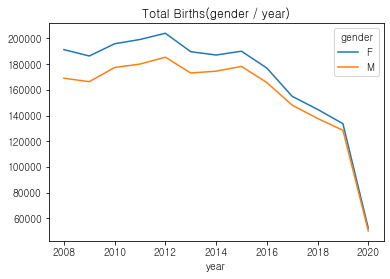

In [5]:
# 그 해에 남여가 얼마나 태어났는지
total_births = names.pivot_table('births', index='year', columns='gender', aggfunc=sum)
total_births.plot(title='Total Births(gender / year)')

In [6]:
# 그 해에 해당 이름이 전체에서 차지하는 비율
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'gender']).apply(add_prop)
names

,name,gender,births,year,prop
0,서연,F,3280,2008,0.017147
1,민서,F,2873,2008,0.015020
2,지민,F,2826,2008,0.014774
3,서현,F,2606,2008,0.013624
4,서윤,F,2484,2008,0.012986
...,...,...,...,...,...
12995,민승,M,20,2020,0.000398
12996,규담,M,20,2020,0.000398
12997,영웅,M,20,2020,0.000398
12998,재성,M,20,2020,0.000398


In [7]:
# 연도별 / 성별에 따른 선호하는 이름 100개 추출
def get_top100(group):
    return group.sort_values(by='births', ascending=False)[:100]
grouped = names.groupby(['year', 'gender'])
top100 = grouped.apply(get_top100)
top100

name gender  births  year      prop
year gender                                          
2008 F      0       서연      F    3280  2008  0.017147
            1       민서      F    2873  2008  0.015020
            2       지민      F    2826  2008  0.014774
            3       서현      F    2606  2008  0.013624
            4       서윤      F    2484  2008  0.012986
...                ...    ...     ...   ...       ...
2020 M      12597   승민      M     126  2020  0.002505
            12598   시환      M     126  2020  0.002505
            12595   재하      M     126  2020  0.002505
            12596   태준      M     126  2020  0.002505
            12599   서율      M     122  2020  0.002426

[2600 rows x 5 columns]

In [8]:
top100.reset_index(inplace=True, drop=True)
top100

,name,gender,births,year,prop
0,서연,F,3280,2008,0.017147
1,민서,F,2873,2008,0.015020
2,지민,F,2826,2008,0.014774
3,서현,F,2606,2008,0.013624
4,서윤,F,2484,2008,0.012986
...,...,...,...,...,...
2595,승민,M,126,2020,0.002505
2596,시환,M,126,2020,0.002505
2597,재하,M,126,2020,0.002505
2598,태준,M,126,2020,0.002505


In [9]:
# 상위 100개의 이름데이터를 남자(boys)와 여자(girls)로 분리
boys = top100[top100.gender == 'M']
boys

,name,gender,births,year,prop
100,민준,M,2642,2008,0.015627
101,지훈,M,2154,2008,0.012741
102,현우,M,1924,2008,0.011380
103,준서,M,1885,2008,0.011150
104,우진,M,1815,2008,0.010736
...,...,...,...,...,...
2595,승민,M,126,2020,0.002505
2596,시환,M,126,2020,0.002505
2597,재하,M,126,2020,0.002505
2598,태준,M,126,2020,0.002505


In [11]:
# 상위 100개의 이름데이터를 남자(boys)와 여자(girls)로 분리
girls = top100[top100.gender == 'F']
girls

,name,gender,births,year,prop
0,서연,F,3280,2008,0.017147
1,민서,F,2873,2008,0.015020
2,지민,F,2826,2008,0.014774
3,서현,F,2606,2008,0.013624
4,서윤,F,2484,2008,0.012986
...,...,...,...,...,...
2495,지은,F,147,2020,0.002801
2496,시현,F,146,2020,0.002782
2497,민아,F,144,2020,0.002744
2498,이안,F,144,2020,0.002744


In [12]:
# 연도와 출생수를 피봇테이블로 변환
total_births = top100.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 2008 to 2020
Columns: 321 entries, 가연 to 혜인
dtypes: float64(321)
memory usage: 32.7 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026345826FD0>,
      dtype=object)

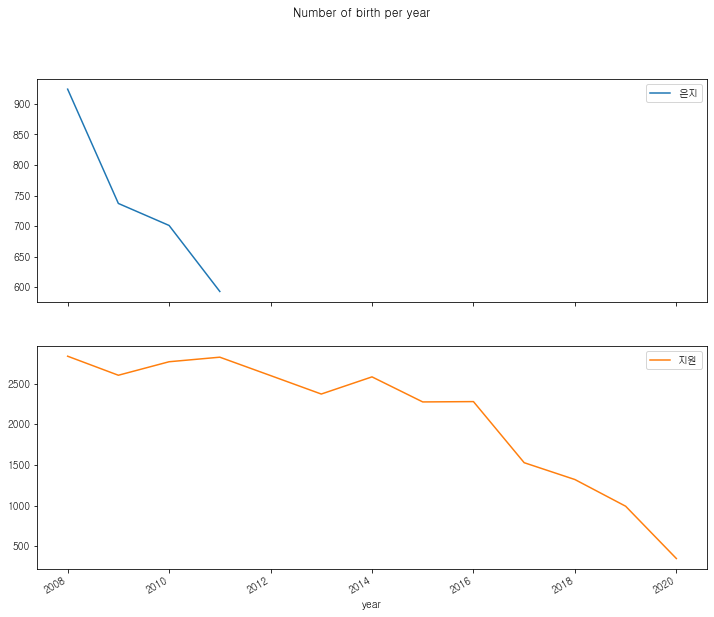

In [13]:
# 해당이름 시대별 추세
subset = total_births[['은지','지원']]
subset.plot(subplots=True,figsize =(12,10), grid=False, title='Number of birth per year')

<Figure size 432x288 with 0 Axes>

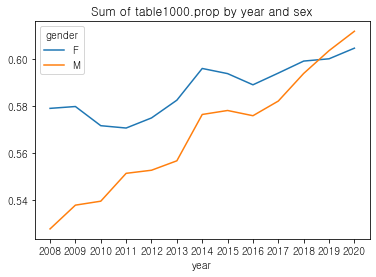

In [14]:
# top100안에 드는 이름들이 전체기준 얼마나 되는지
import matplotlib.pyplot as plt
plt.figure()
table = top100.pivot_table('prop', index='year', columns='gender', aggfunc=sum)

table.plot(title='Sum of table1000.prop by year and sex', xticks=range(2008, 2021, 1)) # 값이 너무 작아서 yticks=np.linspace(0, 1, 1) 지정하기가 힘드네...

In [15]:
df = boys[boys.year == 2008]
y2008 = df.sort_values(by='prop', ascending=False).prop.cumsum()
y2008[:10]
y2008.values.searchsorted(0.5)+1

90

In [16]:
df = boys[boys.year == 2018]
y2018 = df.sort_values(by='prop', ascending=False).prop.cumsum()
y2018[:10]
y2018.values.searchsorted(0.5)+1

69

<Figure size 432x288 with 0 Axes>

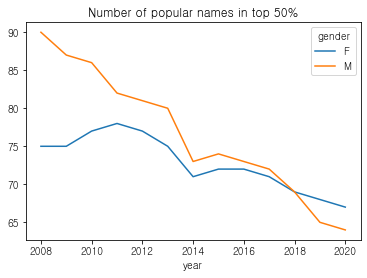

In [17]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top100.groupby(['year', 'gender']).apply(get_quantile_count)
diversity = diversity.unstack('gender')
fig = plt.figure()
diversity.plot(title="Number of popular names in top 50%")

In [18]:
# 이름에서 마지막 글자의 변화
get_last_letter = lambda x:x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index= last_letters, columns=['gender', 'year'], aggfunc=sum)
subtable = table.reindex(columns=[2008, 2013, 2018], level='year')
subtable.head()

gender           F                   M                
year          2008  2013  2018    2008    2013    2018
last_letter                                           
강              NaN   NaN   NaN   106.0    93.0    74.0
건              NaN   NaN   NaN  1755.0  2122.0  1580.0
검              NaN   NaN   NaN     NaN     NaN   114.0
결            184.0  72.0   NaN  1159.0  1065.0   938.0
겸              NaN  71.0  54.0    92.0   187.0   950.0

In [19]:
subtable.sum()
letter_prop = subtable / subtable.sum()
letter_prop

gender              F                             M                    
year             2008      2013      2018      2008      2013      2018
last_letter                                                            
강                 NaN       NaN       NaN  0.000627  0.000537  0.000537
건                 NaN       NaN       NaN  0.010381  0.012259  0.011468
검                 NaN       NaN       NaN       NaN       NaN  0.000827
결            0.000962  0.000380       NaN  0.006855  0.006152  0.006808
겸                 NaN  0.000374  0.000373  0.000544  0.001080  0.006895
...               ...       ...       ...       ...       ...       ...
후            0.003220  0.002836  0.000656  0.012120  0.035459  0.028039
훈                 NaN       NaN       NaN  0.044309  0.031016  0.018988
훤                 NaN       NaN       NaN       NaN       NaN       NaN
휘                 NaN       NaN       NaN  0.001686  0.001306  0.000515
희            0.035534  0.028397  0.023644  0.012705  0.011063  0.007512

[128 rows x 6 columns]

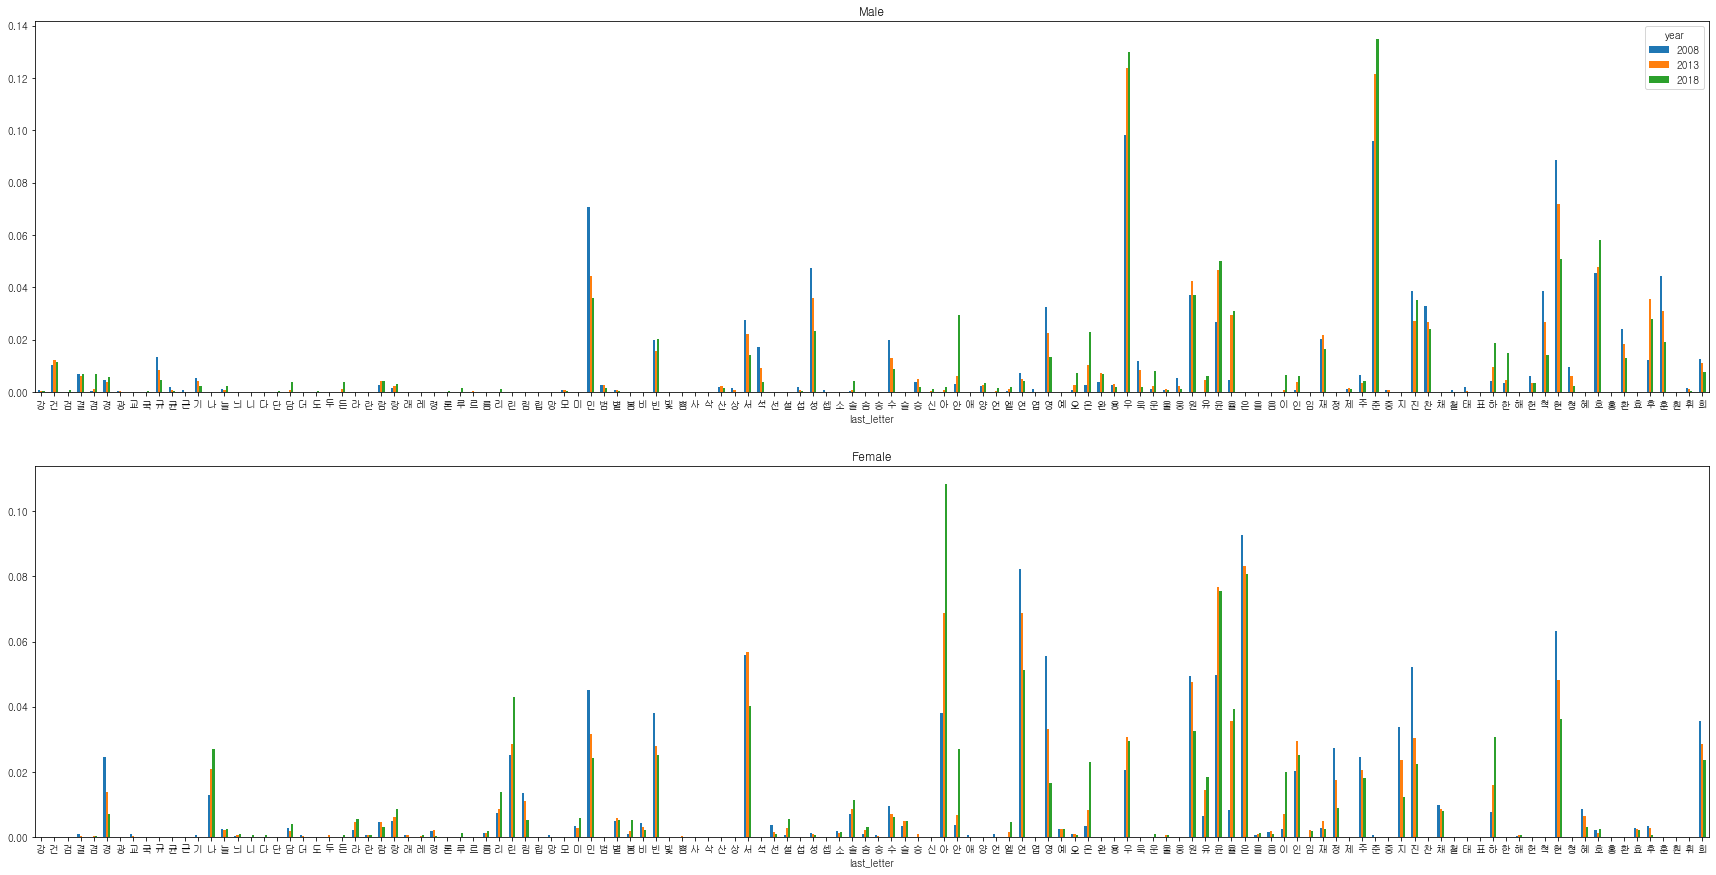

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(30, 15))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

In [21]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['은', '원', '우', '준'], 'M'].T
dny_ts.head()

last_letter,은,원,우,준
year,,,,
2008,NaN,0.037081,0.098378,0.095745
2009,NaN,0.035745,0.106945,0.103008
2010,NaN,0.036200,0.112214,0.112383
2011,NaN,0.048430,0.113082,0.118197
2012,NaN,0.043377,0.120518,0.116748


<Figure size 432x288 with 0 Axes>

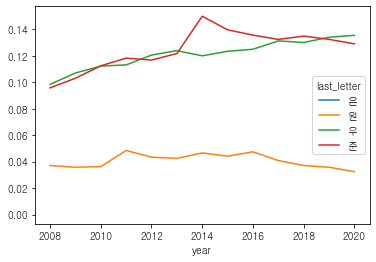

In [22]:
plt.close()
fig = plt.figure()
dny_ts.plot()

In [23]:
# '원' 은 남자이름으로 쓰다가 여자이름으로 바뀌는 이름 중 하나 인가
all_names = pd.Series(top100.name.unique())
lesley_like = all_names[all_names.str.contains('원')]
lesley_like

15     예원
16     지원
20     채원
39     혜원
87     정원
128    재원
147    주원
158    승원
176    원준
216    시원
302    서원
dtype: object

In [24]:
filtered = top100[top100.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
서원      667
승원     3778
시원     7622
예원    16987
원준     2115
재원     8535
정원     2615
주원    24321
지원    27334
채원    21419
혜원     6597
Name: births, dtype: int64

In [25]:
table = filtered.pivot_table('births', index='year', columns='gender', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
#table.tail()
names.groupby(['year', 'gender']).prop.sum()

year  gender
2008  F         1.0
      M         1.0
2009  F         1.0
      M         1.0
2010  F         1.0
      M         1.0
2011  F         1.0
      M         1.0
2012  F         1.0
      M         1.0
2013  F         1.0
      M         1.0
2014  F         1.0
      M         1.0
2015  F         1.0
      M         1.0
2016  F         1.0
      M         1.0
2017  F         1.0
      M         1.0
2018  F         1.0
      M         1.0
2019  F         1.0
      M         1.0
2020  F         1.0
      M         1.0
Name: prop, dtype: float64

<Figure size 432x288 with 0 Axes>

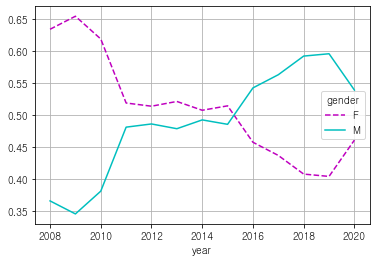

In [26]:
fig = plt.figure()
table.plot(style={'M': 'c-', 'F': 'm--'})
plt.grid()